Vanilla Generative Adversarial Networks using MNIST

In [29]:
# importing libraries
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [11]:
# Mini-Batch Size
mb_size = 64

# transforming images to tensor
transform = transforms.Compose([transforms.ToTensor()])

# downloading dataset
trainset = torchvision.datasets.MNIST(root='./NewData', download=True, train=True, transform=transform)

# Loading the dataset
trainloader = torch.utils.data.DataLoader(trainset, shuffle = True, batch_size = mb_size)

Visualize our dataset

torch.Size([64, 784])
(3, 242, 242)


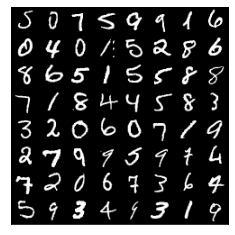

In [33]:
# iterate our data
data_iter = iter(trainloader)

images, labels = data_iter.next()
test = images.view(images.size(0), -1)
print(test.size())

Z_dim = 100
X_dim = test.size(1)

def imgshw(img):
  im = torchvision.utils.make_grid(img)
  npimg = im.numpy()
  print(npimg.shape)
  plt.figure(figsize=(4, 4))
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.xticks([])
  plt.yticks([])

  plt.show()

imgshw(images)

h_dim = 100


In [21]:
# Initializing weights equal to 0

def initweight(m):
  if type(m) == nn.Linear:
    nn.init.xavier_uniform_(m.weight)
    m.bias.data.fill_(0)


In [22]:
# Defining generator function

class Gen(nn.Module):
  def __init__(self):
    super(Gen, self).__init__()
    self.model = nn.Sequential(
        nn.Linear(Z_dim,h_dim),
        nn.ReLU(),
        nn.Linear(h_dim, X_dim),
        nn.Sigmoid()
    )
    self.model.apply(initweight)
  def forward(self, input):
    return self.model(input)


In [23]:
# Defining Discriminator function

class Dis(nn.Module):
  def __init__(self):
      super(Dis, self).__init__()
      self.model = nn.Sequential(
          nn.Linear(X_dim, h_dim),
          nn.ReLU(),
          nn.Linear(h_dim, 1),
          nn.Sigmoid()          
      )
      self.model.apply(initweight)
  def forward(self, input):
    return self.model(input)

In [35]:
G = Gen()
D = Dis()

lr = 1e-3 # Learning Rate

G_solver = optim.Adam(G.parameters(), lr=lr)
D_solver = optim.Adam(D.parameters(), lr=lr)

print(G)
print(D)

Gen(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=784, bias=True)
    (3): Sigmoid()
  )
)
Dis(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


Training GANs

Epoch: 0,   G_Loss: 0.0,  D_Loss: 0.0 
(3, 122, 242)


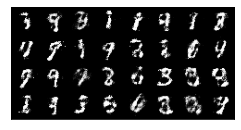

Epoch: 1,   G_Loss: 0.0,  D_Loss: 0.0 
(3, 122, 242)


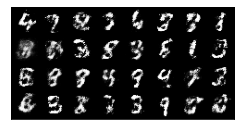

Epoch: 2,   G_Loss: 0.0,  D_Loss: 0.0 
(3, 122, 242)


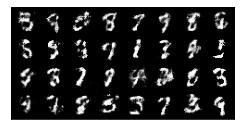

Epoch: 3,   G_Loss: 0.0,  D_Loss: 0.0 
(3, 122, 242)


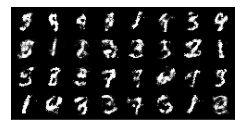

Epoch: 4,   G_Loss: 0.0,  D_Loss: 0.0 
(3, 122, 242)


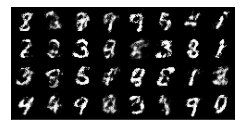

Epoch: 5,   G_Loss: 0.0,  D_Loss: 0.0 
(3, 122, 242)


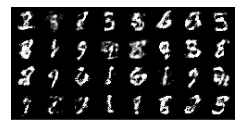

Epoch: 6,   G_Loss: 0.0,  D_Loss: 0.0 
(3, 122, 242)


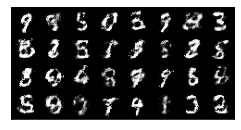

Epoch: 7,   G_Loss: 0.0,  D_Loss: 0.0 
(3, 122, 242)


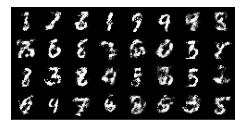

Epoch: 8,   G_Loss: 0.0,  D_Loss: 0.0 
(3, 122, 242)


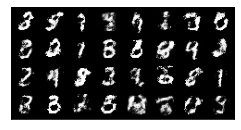

Epoch: 9,   G_Loss: 0.0,  D_Loss: 0.0 
(3, 122, 242)


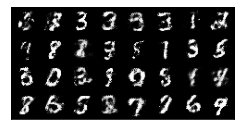

In [34]:
for epoch in range(10):
  G_Loss_run = 0.0
  D_Loss_run = 0.0
  for i, data in enumerate(trainloader):
    X, _ = data
    mb_size = X.size(0)
    X = X.view(X.size(0), -1)

    one_lables = torch.ones(mb_size, 1)
    zero_lables = torch.zeros(mb_size, 1)

    z = torch.randn(mb_size, Z_dim)
    G_sample = G(z)
    D_fake = D(G_sample) # Fake noise generated
    D_real = D(X) # Real images
    D_fake_loss = F.binary_cross_entropy(D_fake, zero_lables)
    D_real_loss = F.binary_cross_entropy(D_real, one_lables)

    D_loss = D_fake_loss + D_real_loss # Total GAN loss

    D_solver.zero_grad()
    D_loss.backward()
    D_solver.step()

    z = torch.randn(mb_size, Z_dim)
    G_sample = G(z)
    D_fake = D(G_sample)

    G_loss = F.binary_cross_entropy(D_fake, one_lables)
    G_solver.zero_grad()
    G_loss.backward()
    G_solver.step()

  print('Epoch: {},   G_Loss: {},  D_Loss: {} '. format(epoch, G_Loss_run/(i+1),D_Loss_run/(i+1)))
  samples = G(z).detach()
  samples = samples.view(mb_size, 1, 28, 28)
  imgshw(samples)